In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("simulation.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([32062, 32063]), array([47, 47]))
-0.0004625995456713424


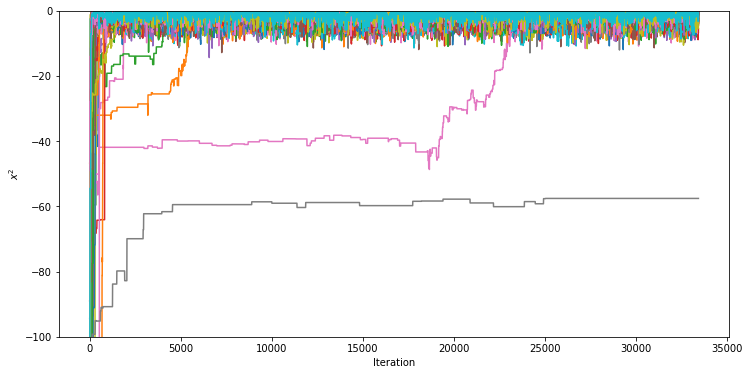

In [5]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-100, 0)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

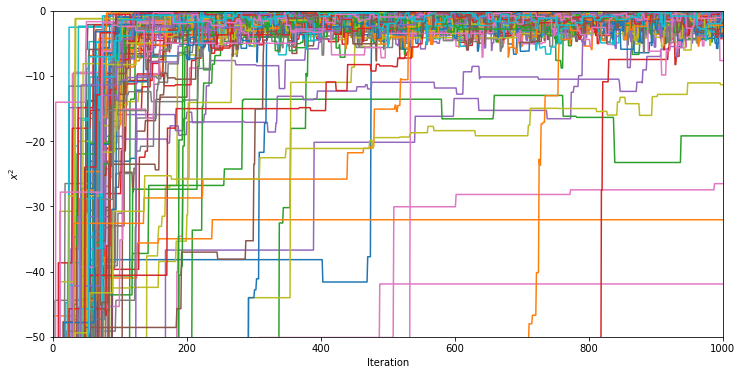

In [6]:
plt.figure(figsize=(12,6))
for i in range(log_prob.shape[1]):
    plt.plot(log_prob[:,i])
    plt.ylim(-50, 0)
    plt.xlim(0,1000)
    plt.ylabel("$ x^2 $")
    plt.xlabel("Iteration")

In [7]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([5451., 5510., 5500., 5511., 5395., 5381., 5484.,   10., 5464.,
       5456., 5215., 5274., 5549., 5399., 5495., 5480., 5109., 5464.,
       5395., 5458., 5500., 5388., 5442., 5508., 5270., 5456., 5408.,
       5586., 5249., 5391., 5420., 5497., 4518., 5370., 5408., 5424.,
       5316., 5417., 5055., 5347., 5519., 5204., 5452., 5399., 5228.,
       5267., 5310., 5374., 5355., 5393., 5355., 4644., 5510., 5570.,
       5413., 5579., 1912., 5323., 5391., 5448., 5303., 5397., 5577.,
       5472., 5303., 5363., 5211., 5325., 5341., 5232., 5163., 5300.,
       5406., 5288., 5402., 5419., 5355., 5454., 5237., 5137., 5339.,
       5440., 5407., 5544., 5371., 5521., 5333., 5300., 5221., 5436.,
       5390., 5306., 5329., 5395., 5295., 5097., 5440., 5604., 5607.,
       5340., 5437., 5436., 5499., 5463., 5394., 5259., 5369., 5532.,
       5286., 5462., 5313., 5306., 5281., 5417., 5516., 5359., 5252.,
         38., 5115., 5530.])

[215.31747525 124.55340777  48.98703364  54.75337745]
flat chain shape: (360, 4)
flat log prob shape: (360,)


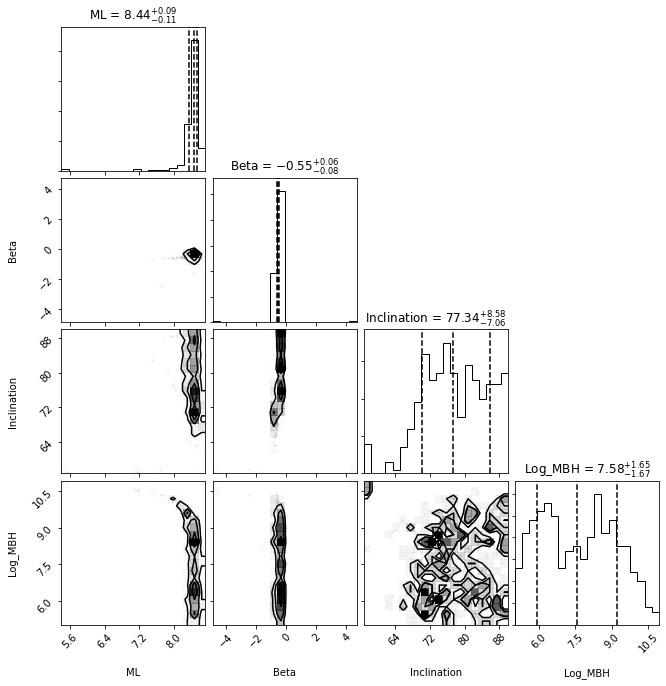

In [8]:
#Corner plots

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(discard=5000, flat=True, thin=8000 )
log_prob_samples = read.get_log_prob(discard=5000,flat=True, thin=8000)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

430 107
flat chain shape: (36960, 4)
flat log prob shape: (36960,)


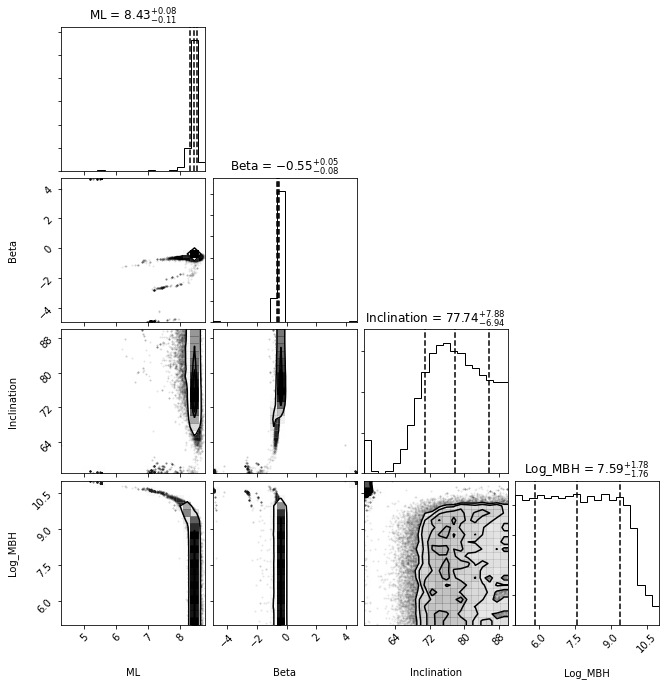

In [9]:
#Corner plots
tau = read.get_autocorr_time()
burnin = int(2 * np.max(tau))
thin = int(0.5 * np.max(tau))
print(burnin, thin)

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

samples = read.get_chain(discard=burnin, flat=True,thin=thin )
log_prob_samples = read.get_log_prob(discard=burnin,flat=True,thin=thin)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels,quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12});

In [10]:
from IPython.display import display, Math

for i in range(4):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
tau = read.get_autocorr_time()
tau

array([215.31747525, 124.55340777,  48.98703364,  54.75337745])

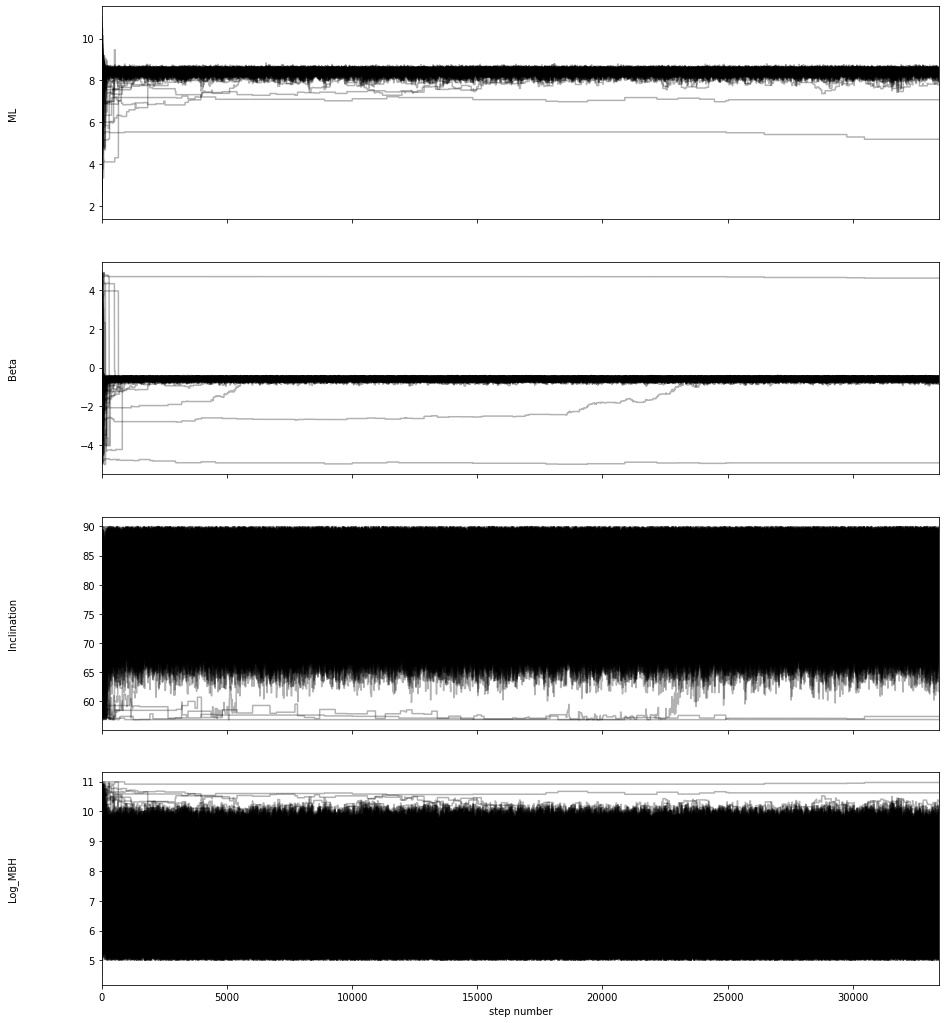

In [12]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)


axes[-1].set_xlabel("step number");

In [13]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

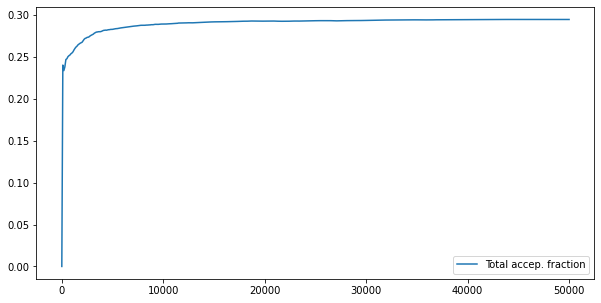

In [14]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.legend()

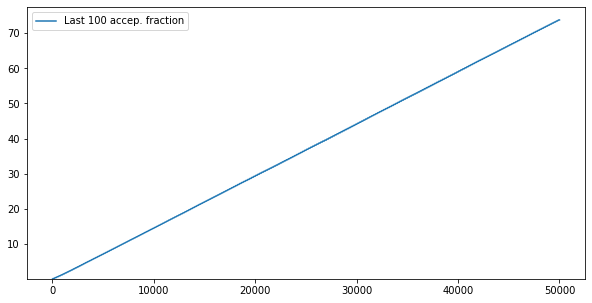

In [15]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim(0.15,)
plt.legend()

## Plot Model Best-Fit

In [13]:
from plotbin.plot_velfield import plot_velfield
from My_Jampy import JAM               #My class
from astropy.cosmology import Planck15 as cosmo

In [14]:
xbin, ybin, rms, goodbins      = np.loadtxt("vrms_data.txt", unpack=True)   #dynamical data
surf_lum, sigma_lum, qobs_lum  = np.loadtxt("JAM_Input.txt", unpack=True)   #mge decomposition
normpsf, sigmapsf              = np.loadtxt("MUSE_Psf_model.txt", unpack=True)         #psf

goodbins = goodbins == 1
pixsize  = 0.2

z_l    = 0.299                                            #Redshift
D_l    = cosmo.angular_diameter_distance(z_l).value                    #Distance to Lens [Mpc] 

In [ ]:
ML=8.4290.082−0.109
Beta=−0.5510.053−0.081
Inclination=77.7417.877−6.937
LogMBH=7.5941.783−1.75

In [15]:
#Best fit

best_ml      = 8.429
best_beta    = np.full_like(surf_lum, -0.551)
best_inc     = 77.741
best_log_mbh = 7.594

/home/carlos/anaconda3/lib/python3.7/site-packages/jampy/legacy/jam_axi_rms.py:281: RuntimeWarning: divide by zero encountered in true_divide
  / signal.fftconvolve(mgeCar, kernel, mode='same')
/home/carlos/anaconda3/lib/python3.7/site-packages/jampy/legacy/jam_axi_rms.py:281: RuntimeWarning: invalid value encountered in true_divide
  / signal.fftconvolve(mgeCar, kernel, mode='same')


jam_axi_rms elapsed time sec: 0.24
inc=77.7 beta_z=-0.55 M/L=1 BH=3.93e+07 chi2/DOF=0.000615
Total mass MGE: 7.345e+11


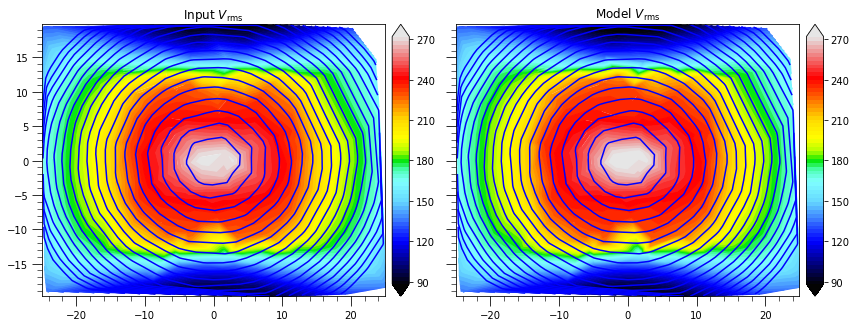

In [16]:
Jam_model = JAM(ybin=ybin, xbin=xbin, inc= best_inc, distance=D_l, mbh=10**(best_log_mbh), rms=rms,
                    beta=best_beta, normpsf=normpsf, sigmapsf=sigmapsf, pixsize=pixsize, goodbins=goodbins)

#Add Luminosity component
Jam_model.luminosity_component(surf_lum=surf_lum, sigma_lum=sigma_lum,
                                    qobs_lum=qobs_lum, ml=best_ml)

plt.figure(figsize=(12,12))
My_model, ml, chi2, chi2T = Jam_model.run(plot=True, quiet=False, cmap="sauron")
plt.tight_layout()

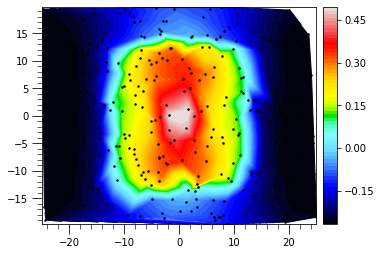

In [17]:
#Plot difference between data and my model
diff = rms - My_model
plot_velfield(xbin, ybin, diff, colorbar=True)

In [19]:
print("Chi2/DOF:",chi2)
print("Chi2 Total", chi2T)

Chi2/DOF: 0.0006153881434122116
Chi2 Total 0.18461644302366348
